In [1]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
from pathlib import Path
from cenpy import products
import shapely.wkt

In [5]:
# https://data.cityofchicago.org/Transportation/Divvy-Bicycle-Stations/bbyy-e7gq/data
# station locations in Chicago
#https://divvy-tripdata.s3.amazonaws.com/index.html for trip data
divy_df = pd.read_csv("../Data/Chicago/Divvy_Bicycle_Stations.csv") #location of healthy ride bike stations

#get the 2010 census tracts in Chicago
cenTract = gpd.read_file('../Data/Chicago/CensusTract2010/geo_export_bf428af7-5d56-479c-9721-0ee9e91b6661.shp')

In [6]:
#convert hr_df to geodataframe to plot the bike stations on map
geometry = [Point(xy) for xy in zip(divy_df.Longitude, divy_df.Latitude)]
crs = 26916
divy_gdf = gpd.GeoDataFrame(divy_df, crs=crs, geometry=geometry)

Text(0.5, 1.0, 'Divvy Bike Station Locations Current Day')

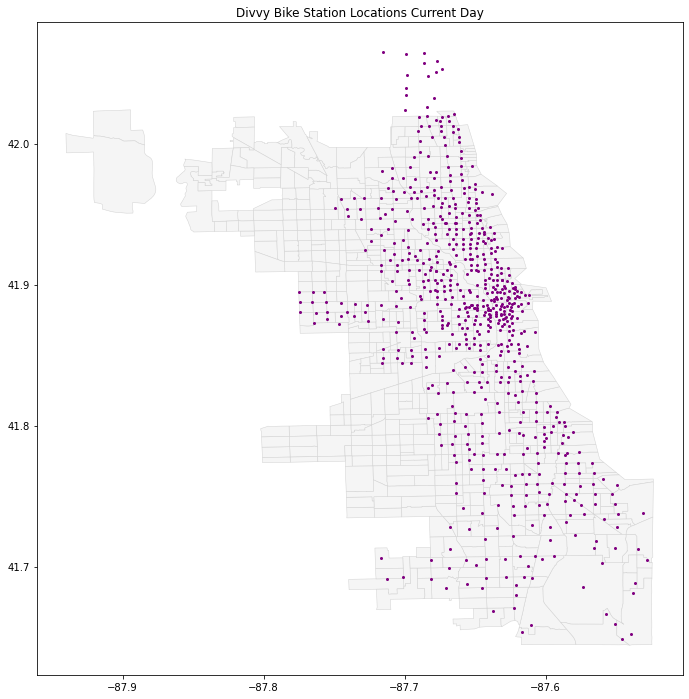

In [7]:
#plot the census tracts and the location of the bike stations
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
divy_gdf.plot(ax=ax, color="Purple", markersize=4)
plt.title("Divvy Bike Station Locations Current Day")

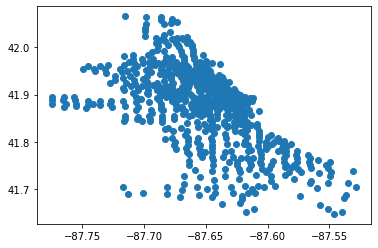

In [11]:
plt.scatter(divy_df['Longitude'], divy_df['Latitude'])
plt.show()

<AxesSubplot:>

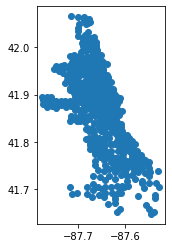

In [12]:
divy_gdf.plot()

In [5]:
cenTract

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,COMMAREA,COMMAREA_N,NOTES,geometry
0,17,031,842400,17031842400,8424,Census Tract 8424,44,44,None,"POLYGON ((1177855.557 1845080.015, 1177855.599..."
1,17,031,840300,17031840300,8403,Census Tract 8403,59,59,None,"POLYGON ((1160668.954 1878739.961, 1160672.597..."
2,17,031,841100,17031841100,8411,Census Tract 8411,34,34,None,"POLYGON ((1176043.375 1889735.517, 1176045.942..."
3,17,031,841200,17031841200,8412,Census Tract 8412,31,31,None,"POLYGON ((1160019.224 1890664.257, 1160010.757..."
4,17,031,838200,17031838200,8382,Census Tract 8382,28,28,None,"POLYGON ((1165501.359 1897445.310, 1165538.639..."
...,...,...,...,...,...,...,...,...,...,...
796,17,031,071000,17031071000,710,Census Tract 710,7,7,None,"POLYGON ((1169304.836 1913647.470, 1169306.196..."
797,17,031,071200,17031071200,712,Census Tract 712,7,7,None,"POLYGON ((1171907.021 1914880.325, 1171911.354..."
798,17,031,130300,17031130300,1303,Census Tract 1303,13,13,None,"POLYGON ((1152539.157 1937002.093, 1152443.466..."
799,17,031,292200,17031292200,2922,Census Tract 2922,29,29,None,"POLYGON ((1153199.386 1890446.375, 1153092.407..."


### Finding the number of stations they started with in 2013

In [13]:
stations_2013 = gpd.read_file('../Data/Chicago/TripData/Divvy_Stations_Trips_2013/Divvy_Stations_2013/Divvy_Stations_2013.shp')


<AxesSubplot:>

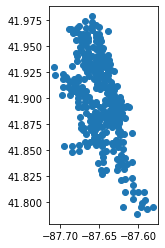

In [14]:
stations_2013.plot()

Text(0.5, 1.0, 'Divvy Bike Station Locations in 2013')

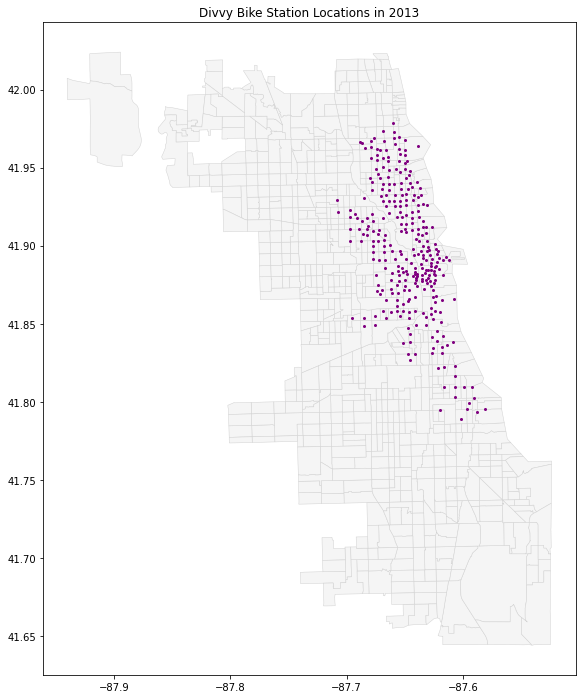

In [16]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
stations_2013.plot(ax=ax, color="Purple", markersize=4)
plt.title("Divvy Bike Station Locations in 2013")

# Census Tract Analyses

In [2]:
CHI_demographics = products.ACS(2019).from_place('Chicago, IL', level = 'tract',
                                                variables = ['B01003_001E', #total population
                                                            'B02001_002E', #white alone
                                                            'B02001_003E', #black or african american alone
                                                            'B02001_004E', #american indian / alaskan native
                                                            'B02001_005E' #asian alone
                                                            ])

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Matched: Chicago, IL to Chicago city within layer Incorporated Places


In [13]:
CHI_demographics2013 = products.ACS(2015).from_place('Chicago, IL', level = 'tract',
                                                variables = ['B01003_001E', #total population
                                                            'B02001_002E', #white alone
                                                            'B02001_003E', #black or african american alone
                                                            'B02001_004E', #american indian / alaskan native
                                                            'B02001_005E' #asian alone
                                                            ])

KeyError: 'Dataset tigerWMS_ACS2015 not found. Please check cenpy.tiger.available()'

In [3]:
chi_crs = CHI_demographics.to_crs("EPSG:4326")
chi_crs.head(1)

,GEOID,geometry,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,state,county,tract
0,17031170200,"POLYGON ((-87.78656 41.95292, -87.78607 41.952...",3754.0,2822.0,1.0,0.0,351.0,17,031,170200


Text(0.5, 1.0, 'Percent of race (white) by census tract in relation to healthy Ride Stations \n Note: ACS has not reported for some Census Tracts')

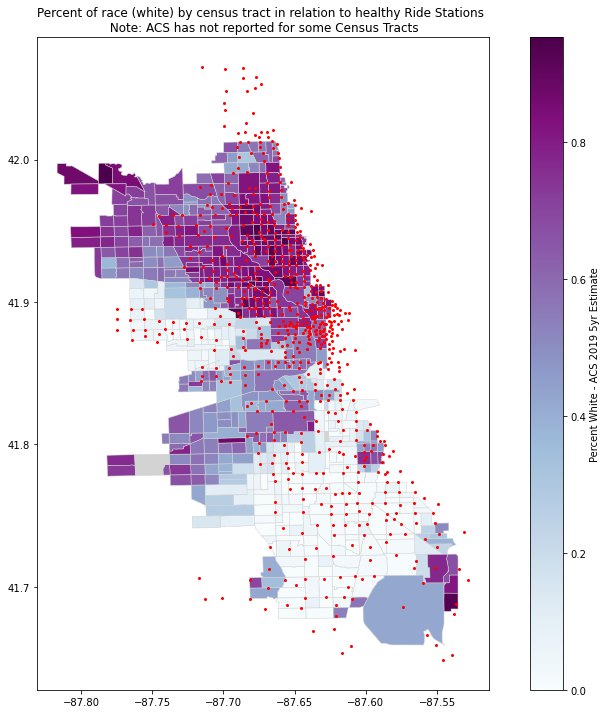

In [8]:
chi_crs['perc_white'] = chi_crs['B02001_002E'] / chi_crs['B01003_001E']
ax = chi_crs.plot(column = "perc_white", cmap="BuPu",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5,
                   legend=True, legend_kwds={'label': "Percent White - ACS 2019 5yr Estimate",
                                                                     'orientation': "vertical"},
                  missing_kwds={"color": "lightgrey"}
                 )
divy_gdf.plot(ax=ax, color="Red", markersize=4)
plt.title("Percent of race (white) by census tract in relation to healthy Ride Stations \n Note: ACS has not reported for some Census Tracts")

Text(0.5, 1.0, 'Percent of race (african american or black) by census tract in relation to Citi Bike Stations \n  Note: ACS has not reported for some Census Tracts')

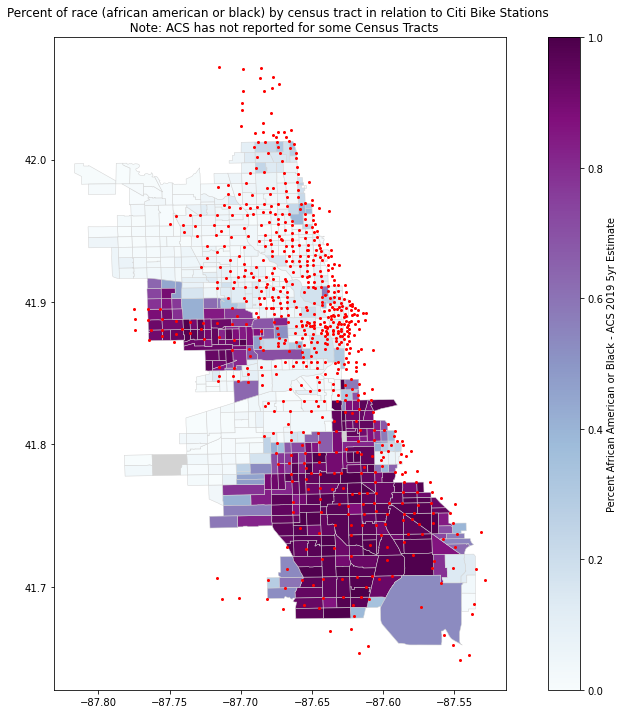

In [9]:
chi_crs['perc_black'] = chi_crs['B02001_003E'] / chi_crs['B01003_001E']
ax2 = chi_crs.plot(column = "perc_black", cmap="BuPu",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5, legend=True, 
                    legend_kwds={'label': "Percent African American or Black - ACS 2019 5yr Estimate",
                                                                     'orientation': "vertical"},
                  missing_kwds={"color": "lightgrey"})
divy_gdf.plot(ax=ax2, color="Red", markersize=4)
plt.title("Percent of race (african american or black) by census tract in relation to Citi Bike Stations \n  Note: ACS has not reported for some Census Tracts")

In [1]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
from pathlib import Path

In [2]:
def geoify_df(station_df):
    #convert hr_df to geodataframe to plot the bike stations on map
    try:
        geometry = [Point(xy) for xy in zip(station_df.Longitude, station_df.Latitude)]
        crs = 4326
        station_gdf = gpd.GeoDataFrame(station_df, crs=crs, geometry=geometry)
    except:
        print("unable to convert to geodf")
        station_gdf = None
    return station_gdf

In [ ]:
def station_df(list_df, filenames=['nyc_stations.csv']):
    filtered_gdf = []
    count = 0
    
    #for every df in the list of df sent in
    for df in list_df:
        #rename all of the columns to get rid of spaces
        df = df.rename(columns={'Trip id': 'Tripid', 'From station id': 'start_station_id',
                               'From station name': 'start_station_name', 'To station id': 
                               'end_station_id', 'To station name': 'end_station_name'})

        
        
        #address any NaN values in station id field
        for row, col in df.iterrows():
            if pd.isna(df.loc[row]['start_station_id']):
                df.at[row,'start_station_id'] = 0
            if pd.isna(df.loc[row]['end_station_id']):
                df.at[row,'end_station_id'] = 0

        df['start_station_id'] = df.start_station_id.astype(int)
        df['end_station_id'] = df.start_station_id.astype(int)

        ##filter for start station locations
        stations_df = df.drop_duplicates(subset='start_station_id')
        stations_df = stations_df.reset_index()
        stations_df = stations_df.drop(columns=['index', 'Tripid', 'Starttime', 'Stoptime', 'Bikeid',
                                                      'Tripduration','Usertype', 'end_station_id', 'end_station_name'])
        stations_df = stations_df.rename(columns = {'start_station_id':'station_id', 'start_station_name': 'Station_Name'})

        # ## filter for end station locations
        end_stations_df = df.drop_duplicates(subset='end_station_id')
        end_stations_df = end_stations_df.reset_index()
        end_stations_df = end_stations_df.drop(columns=['index', 'Tripid', 'Starttime', 'Stoptime', 'Bikeid',
                                                      'Tripduration','Usertype', 'start_station_id', 'start_station_name'])
        end_stations_df = end_stations_df.rename(columns={'end_station_id':'station_id', 'end_station_name': 'Station_Name'})

        # #concat the two dataframes together and drop duplicates once more
        combo_stations_df = pd.concat([stations_df, end_stations_df])
        combo_stations_df = combo_stations_df.drop_duplicates(subset='station_id')
        combo_stations_df = combo_stations_df.reset_index()
        combo_stations_df = combo_stations_df.drop(columns=['index'])

        final_stations_df = combo_stations_df.merge(stations_centract_df, on='station_id')

        #save the data frame
        try:
            final_stations_df.to_csv('../Data/PGH/stations/'+filenames[count])
        except:
            print('Cannot convert dataframe to csv.')
        
        filtered_gdf.append(geoify_df(final_stations_df))
        print(filenames[count])
        count += 1
        
    return filtered_gdf